In [3]:
import pandas as pd

data = pd.read_csv("../Data/insurance3r2.csv")

In [4]:
data.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
steps             1338 non-null int64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [6]:
data

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


In [7]:
X = data.iloc[:,:8]
Y = data.iloc[:,8]


In [8]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2)

In [9]:
test_X

,age,sex,bmi,steps,children,smoker,region,charges
939,53,1,29.480,5005,0,0,2,9487.64420
924,43,1,23.200,8008,0,0,3,6250.43500
545,49,1,25.840,4004,2,1,1,23807.24060
856,48,0,33.110,4005,0,1,2,40974.16490
444,56,1,26.695,8008,1,1,1,26109.32905
...,...,...,...,...,...,...,...,...
424,48,1,30.200,4000,2,0,3,8968.33000
554,25,0,41.325,3003,0,0,0,17878.90068
1104,37,1,29.800,8004,0,0,3,20420.60465
483,51,0,39.500,4008,1,0,3,9880.06800


In [10]:
_corr = data.corr()
_corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1,-0.0208559,0.109272,-0.167957,0.042469,-0.0250188,0.00212731,0.299008,0.113723
sex,-0.0208559,1,0.0463712,-0.0394698,0.017163,0.0761848,0.00458839,0.0572921,0.0315653
bmi,0.109272,0.0463712,1,-0.681149,0.0127589,0.00375043,0.157566,0.198341,0.384198
steps,-0.167957,-0.0394698,-0.681149,1,0.0553455,-0.267845,-0.0764827,-0.30557,-0.419514
children,0.042469,0.017163,0.0127589,0.0553455,1,0.00767312,0.0165694,0.0679982,-0.409526
smoker,-0.0250188,0.0761848,0.00375043,-0.267845,0.00767312,1,-0.00218068,0.787251,0.333261
region,0.00212731,0.00458839,0.157566,-0.0764827,0.0165694,-0.00218068,1,-0.00620823,0.0208915
charges,0.299008,0.0572921,0.198341,-0.30557,0.0679982,0.787251,-0.00620823,1,0.309418
insuranceclaim,0.113723,0.0315653,0.384198,-0.419514,-0.409526,0.333261,0.0208915,0.309418,1


In [11]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


k_possible_values = range(1,150)

f1_scores = []

for k in k_possible_values:
    
    # WHat is happening over here ?
    # A) Is this training the model
    # B) Is this predicting using model
    # C) Is this initializing the model
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X,train_Y)
    pred_Y = knn.predict(test_X)
    f1_score = metrics.f1_score(pred_Y,test_Y)
    f1_scores.append(f1_score)
    
    

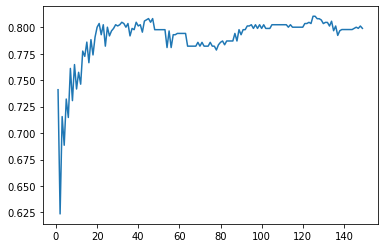

In [12]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.plot(k_possible_values,f1_scores)

plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

# Step 1. Initialization of the Model 
lr = LogisticRegression()

# Step 2. Training the model using Training Dataset
lr.fit(train_X,train_Y)

# Step 3. Make the Predictions for your Testing Dataset [Test_X or Testing Input Variables] 
pred_Y = lr.predict(test_X)

# Step 4. Evaluate your model performance using f1 score
f1_score = metrics.f1_score(pred_Y,test_Y)

print(f1_score)

0.884272997032641


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(train_X,train_Y)

pred_Y = svc.predict(test_X)

f1_score = metrics.f1_score(pred_Y,test_Y)

print(f1_score)

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7909090909090909


In [16]:
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5)



In [17]:
folds

KFold(n_splits=5, random_state=None, shuffle=False)

In [21]:
for train_idx,test_idx in folds.split(X):
    train_X,test_X = X.iloc[train_idx,:],X.iloc[test_idx,:]
    train_Y,test_Y = Y.iloc[train_idx],Y.iloc[test_idx]
    print(train_X)
    print(test_X)

      age  sex    bmi  steps  children  smoker  region     charges
268    45    1  30.20   4006         1       0       3   7441.0530
269    49    1  25.84   8010         1       0       0   9282.4806
270    18    1  29.37   8003         1       0       2   1719.4363
271    50    1  34.20   4000         2       1       3  42856.8380
272    41    1  37.05   4006         2       0       1   7265.7025
...   ...  ...    ...    ...       ...     ...     ...         ...
1333   50    1  30.97   4008         3       0       1  10600.5483
1334   18    0  31.92   3003         0       0       0   2205.9808
1335   18    0  36.85   3008         0       0       2   1629.8335
1336   21    0  25.80   8009         0       0       3   2007.9450
1337   61    0  29.07   8008         0       1       1  29141.3603

[1070 rows x 8 columns]
     age  sex     bmi  steps  children  smoker  region      charges
0     19    0  27.900   3009         0       1       3  16884.92400
1     18    1  33.770   3008       